# Predicting Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

#### Create data dictionary

1.  **age** - age in years
2.  **sex** - (1 = male; 0 = female)
3.  **cp** - chest pain type
    * 0: Typical angina: chest pain related to decreased blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non-heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4.  **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.  **chol** - serum cholesterol in mg/dl
    * serum = LDL + HDL + 0.2 * triglycerides
    * above 200 is cause for concern
6.  **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dl signals diabetes
7.  **restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8.  **thalach** - maximum heart rate achieved
9.  **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest; looks at stress of heart during exercise. An unhealthy heart will stress more.
11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downsloping: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by fluoroscopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal** - thallium stress result
    * 1,3: normal
    * 6: fixed defect: used to be a defect but ok now
    * 7: reversible defect: no proper blood movement when exercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [208]:
# Import all the tool we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

#Models from scikitlearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [209]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1.  What question(s) are you trying to solve?
2.  What kind of data do we have and how do we treat different types?
3.  What's missing from the data and how do you deal with it?
4.  Where are the outliers and why should you care about them?
5.  How can you add, change or remove features to get more out of your data?

In [210]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [211]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [212]:
len(df)

303

In [213]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [215]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

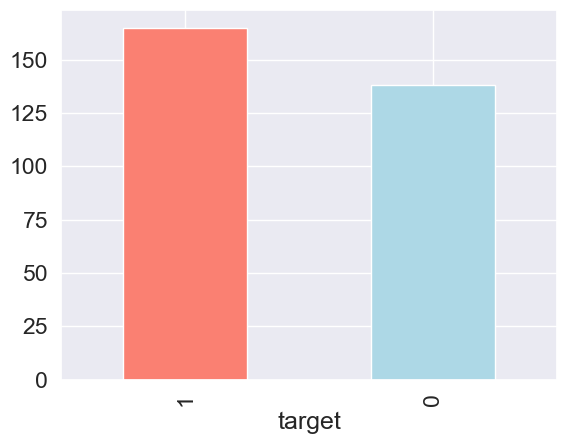

In [216]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

In [217]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [218]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [219]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [220]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


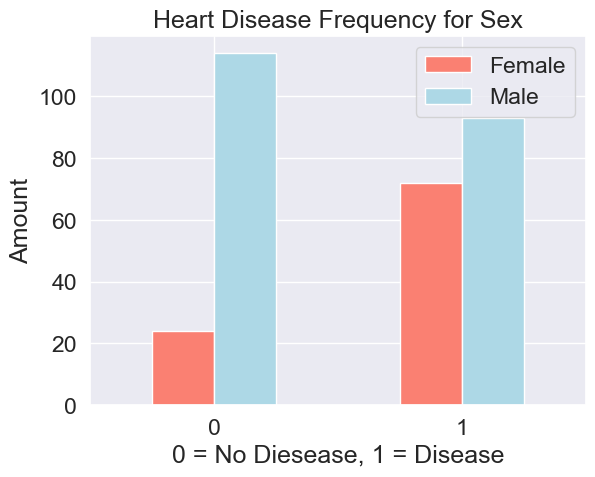

In [221]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)
plt.show()

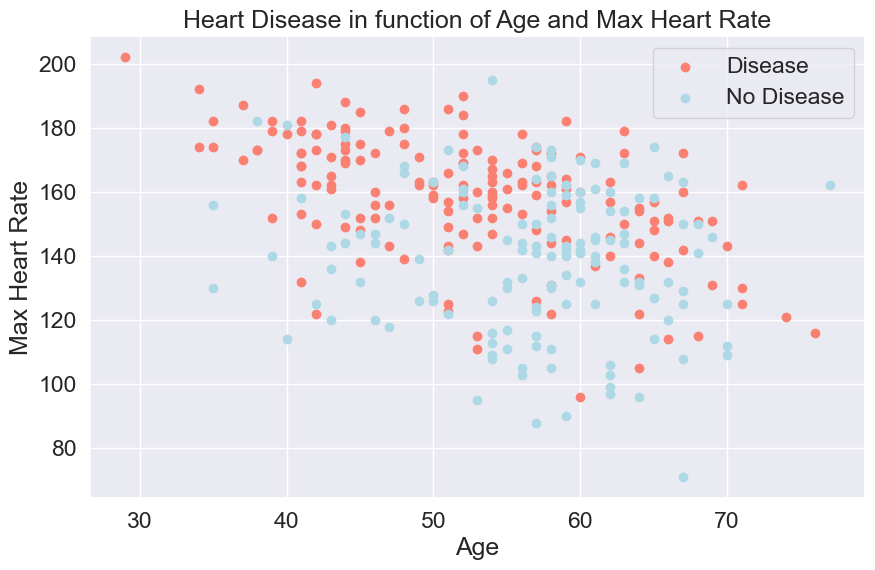

In [222]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
plt.show()

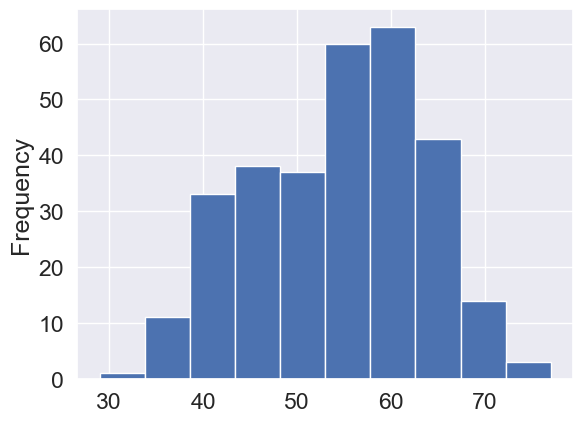

In [223]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();
plt.show()

#### Heart Disease Frequency per Chest Pain Type
cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [224]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


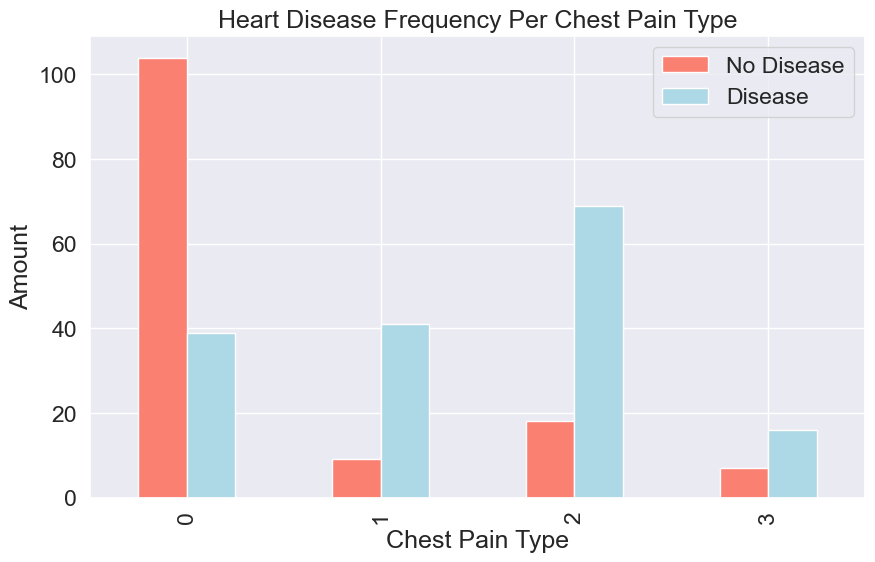

In [225]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.show()

In [226]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [227]:
#Make a correlational Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


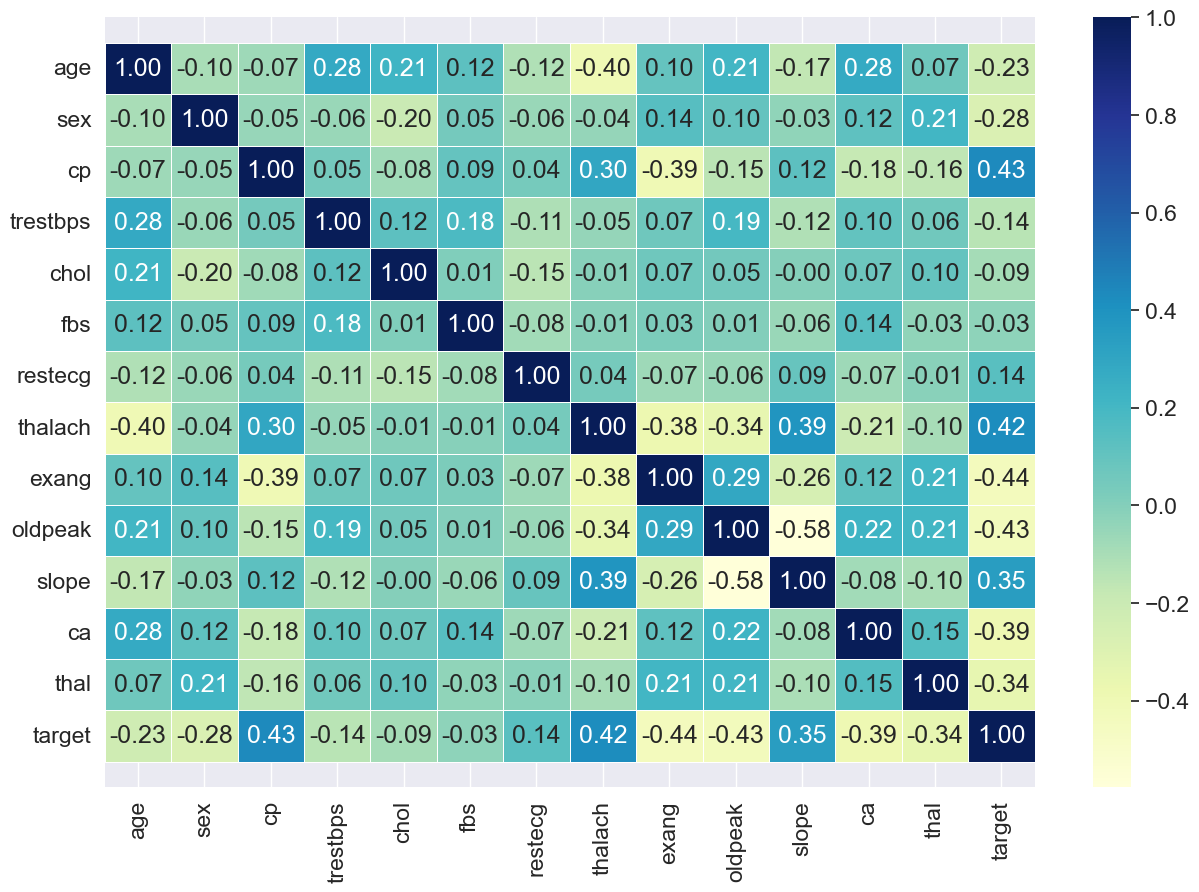

In [228]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## 5. Modelling

In [229]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [230]:
X = df.drop("target",axis=1)

y = df.target

In [231]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [232]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [233]:
# Split the data into test and train 
np.random.seed(44)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [234]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2


In [235]:
y_train, len(y_train)

(135    1
 263    0
 174    0
 51     1
 291    0
       ..
 96     1
 59     1
 173    0
 241    0
 276    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into trainning and test set, it's time to build an machiine learning Model.

We'll train it (find the patterns) on the training set.

and we'll test it (use the pattern) on the test set.

We are going to train three different ML models:
1. Logistic Regression
2. K-neareest Neighbour Classifier
3. Random Forest Classsifier
4. Gradient Boosting

In [236]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
    

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates Given Machine Learning Models.
    models : a dict of different scikit-learn Models
    X_train : Training data (no labels)
    X_test : Testing data (no labels)
    y_train : Training labels
    y_tets : Testing Labels
    """
    #Set random Seed
    np.random.seed(44)

    # Make a list to keep Model Score
    models_score = {}

    # Loop Through Models
    for name,model in models.items():
        #Fit the Model to the data
        model.fit(X_train,y_train)

        #Evaluate the model and append it's score to models_score
        models_score[name] = model.score(X_test,y_test)

    return models_score

In [237]:
models_score = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
models_score

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.819672131147541}

#### Model Comparision

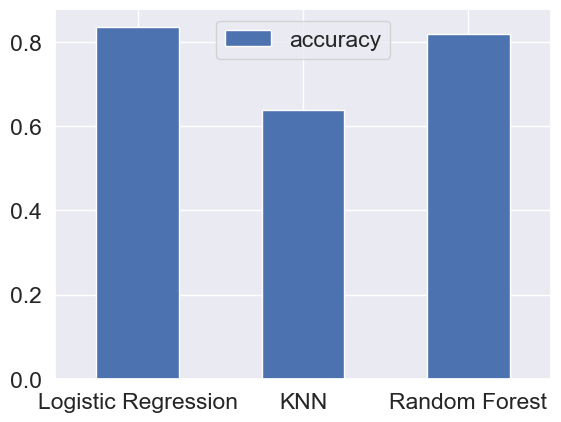

In [238]:
models_compare = pd.DataFrame(models_score,index=["accuracy"])
models_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.show()

Now we've fot a baseline model and we know a model's forst prediction aren't always what we should based our next steps off. What should we do?

Let's Look at the following:

1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-Validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC Curve
10. Area Under Curve (AUC)

### HyperParameter Tuning

In [239]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [240]:
train_scores

[1.0,
 0.7768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.7479338842975206,
 0.743801652892562,
 0.7107438016528925,
 0.7107438016528925,
 0.6983471074380165,
 0.6900826446280992,
 0.6611570247933884,
 0.6776859504132231,
 0.6942148760330579,
 0.6652892561983471,
 0.6776859504132231,
 0.6859504132231405,
 0.6776859504132231,
 0.6570247933884298,
 0.6776859504132231,
 0.6570247933884298]

In [241]:
test_scores

[0.6721311475409836,
 0.5901639344262295,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853]

Maximum KNN score on the test data: 73.77%


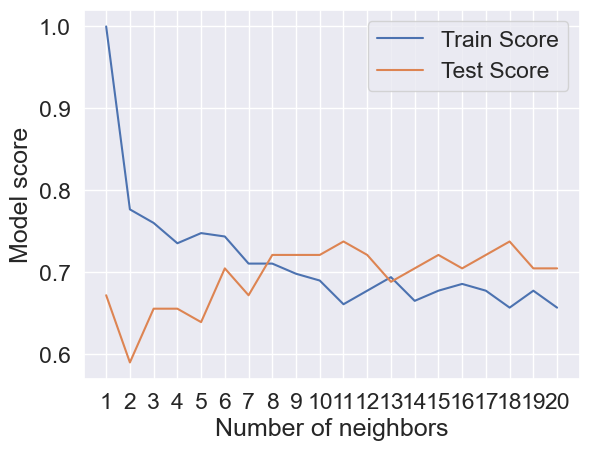

In [242]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
plt.show()

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

- LogisticRegression()
- RandomForestClassifier()

using RandomizedSearchCV

In [243]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 4),
           "min_samples_leaf": np.arange(1, 20, 4)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [244]:
# stup random seed 

np.random.seed(44)

rs_log_rg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

rs_log_rg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [245]:
rs_log_rg.best_params_

{'solver': 'liblinear', 'C': np.float64(4.281332398719396)}

In [246]:
rs_log_rg.score(X_test,y_test)

0.8360655737704918

In [ ]:
# Setup random seed
np.random.seed(44)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test,y_test)

### Hyperparamter Tuning with GridSearchCV

Grid Saerch CV for Random Forest

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid,
                    cv=5,
                    verbose=3)

gs_rf.fit(X_train,y_train)

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(X_test, y_test)

In [ ]:
print("Best CV score:", gs_rf.best_score_)
print("Best parameters:", gs_rf.best_params_)
print("Test score:", gs_rf.best_estimator_.score(X_test, y_test))


Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(X_test, y_test)

### Evaluting our tuned machine learning classifier, beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
  
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make Predictions with Best Logarithmic Regression
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(gs_log_reg,X,y)
plt.show()

In [ ]:
# Prin t Confusion Matrix
confusion_matrix(y_test,y_preds)

In [ ]:
pd.crosstab(y_test, y_preds, rownames=["Actual"], colnames=["Predicted"])

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """ 
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()

plot_conf_mat(y_test,y_preds)


Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [ ]:
# Classification Report
print(classification_report(y_test,y_preds))

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=4.893900918477489,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf, X, y ,cv=5, scoring="accuracy")
cv_accuracy

In [ ]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

In [ ]:
# Cross-validated Precision

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")

cv_precision = cv_precision.mean()
cv_precision

In [ ]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

In [ ]:
# Cross Validated F1 score

cv_f1 = cross_val_score(clf, X, y,cv=5, scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

In [ ]:
cv_metrics= pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},index=[0])

cv_metrics

In [ ]:
cv_metrics.T.plot(kind="bar",legend=False)
plt.title("Cross Validated Classification metrics")
plt.show()

### Feature Importance

Let's find the feature importance for our LogisticRegression model...

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=4.893900918477489,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

In [ ]:
# Match coef of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

feature_dict

In [ ]:
df.head()

In [ ]:
# Visualise Feature Importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False)
plt.title("Feature Importance")
plt.show()

In [ ]:
pd.crosstab(df.sex,df.target)

In [ ]:
pd.crosstab(df.slope,df.target)

slope - the slope of the peak exercise ST segment

- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

In [252]:
# Save Model to File
from joblib import dump

dump(gs_log_reg,"heart-disease-logrithmic-model-1.joblib")

['heart-disease-logrithmic-model-1.joblib']